In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('/content/jogja_fix____.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alamat                   1340 non-null   object 
 1   harga                    1340 non-null   int64  
 2   kamar_tidur              1340 non-null   int64  
 3   bangunan                 1340 non-null   int64  
 4   lahan                    1340 non-null   int64  
 5   kamar_mandi              1340 non-null   int64  
 6   sistem_alarm             1340 non-null   object 
 7   gym                      1340 non-null   object 
 8   internet_broadband_wifi  1340 non-null   object 
 9   tv_kabel                 1340 non-null   object 
 10  pemanas_ruangan          1340 non-null   object 
 11  air_panas                1340 non-null   object 
 12  telepon                  1340 non-null   object 
 13  tv                       1340 non-null   object 
 14  kitchen_set             

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [85]:
skewness_features = ['harga', 'kamar_tidur', 'bangunan', 'lahan', 'kamar_mandi']
skewness_subset = df[skewness_features]

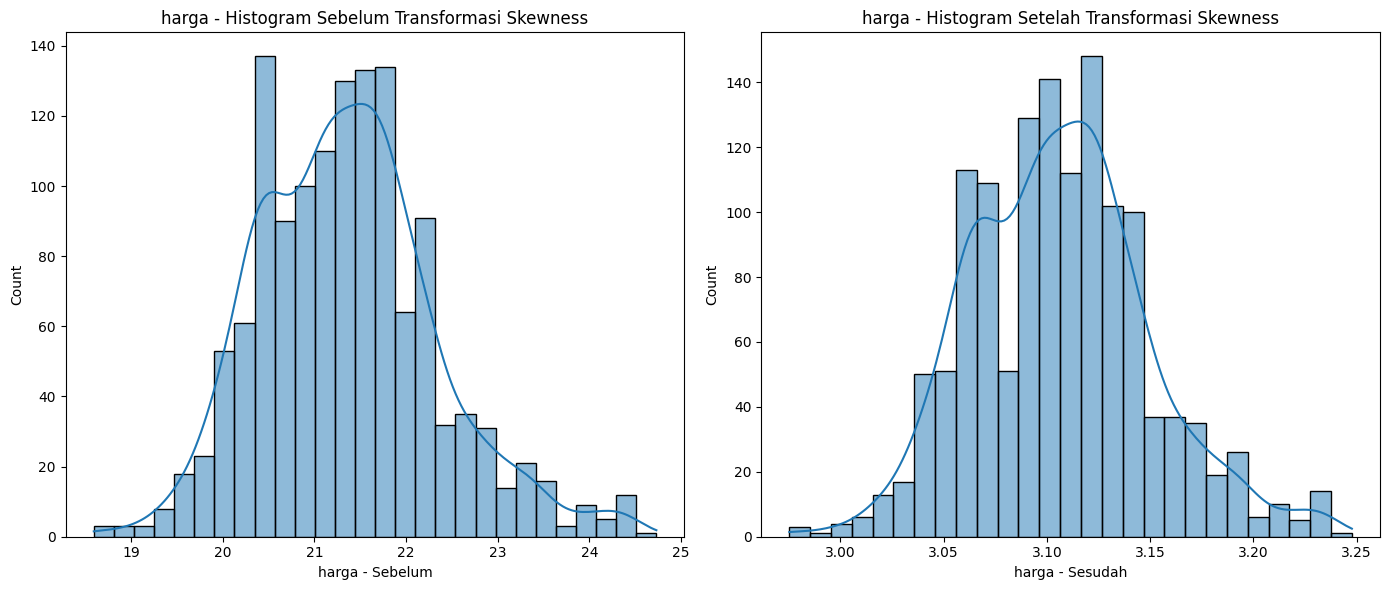

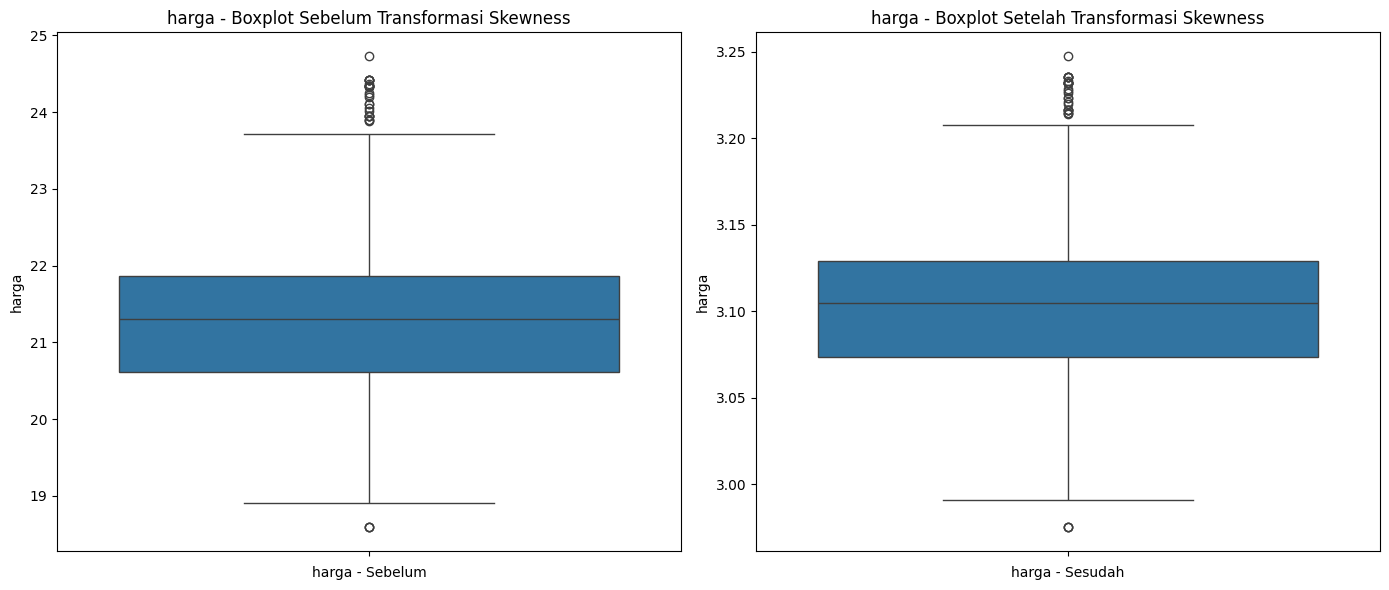

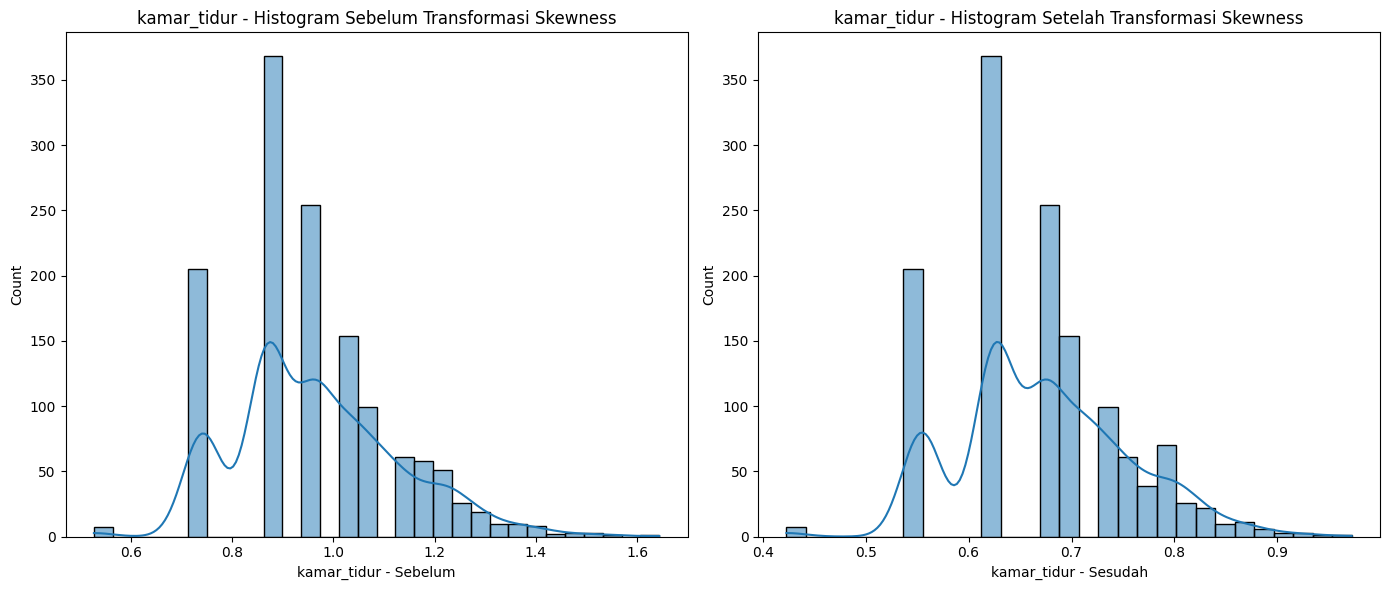

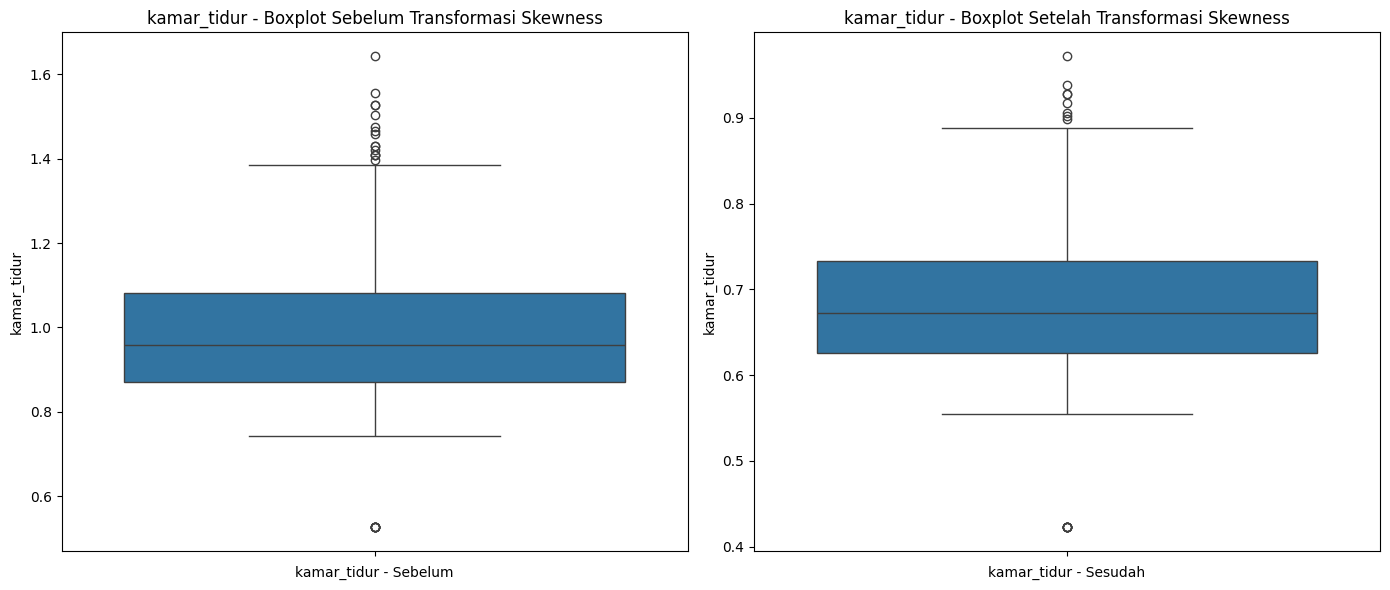

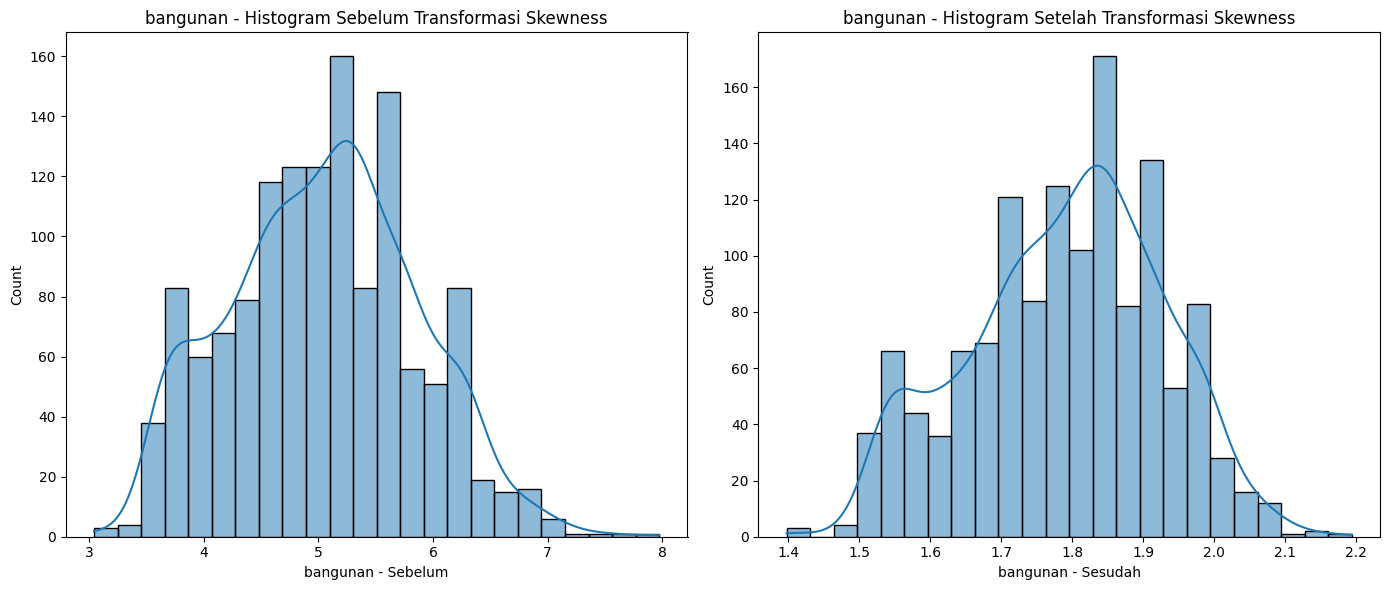

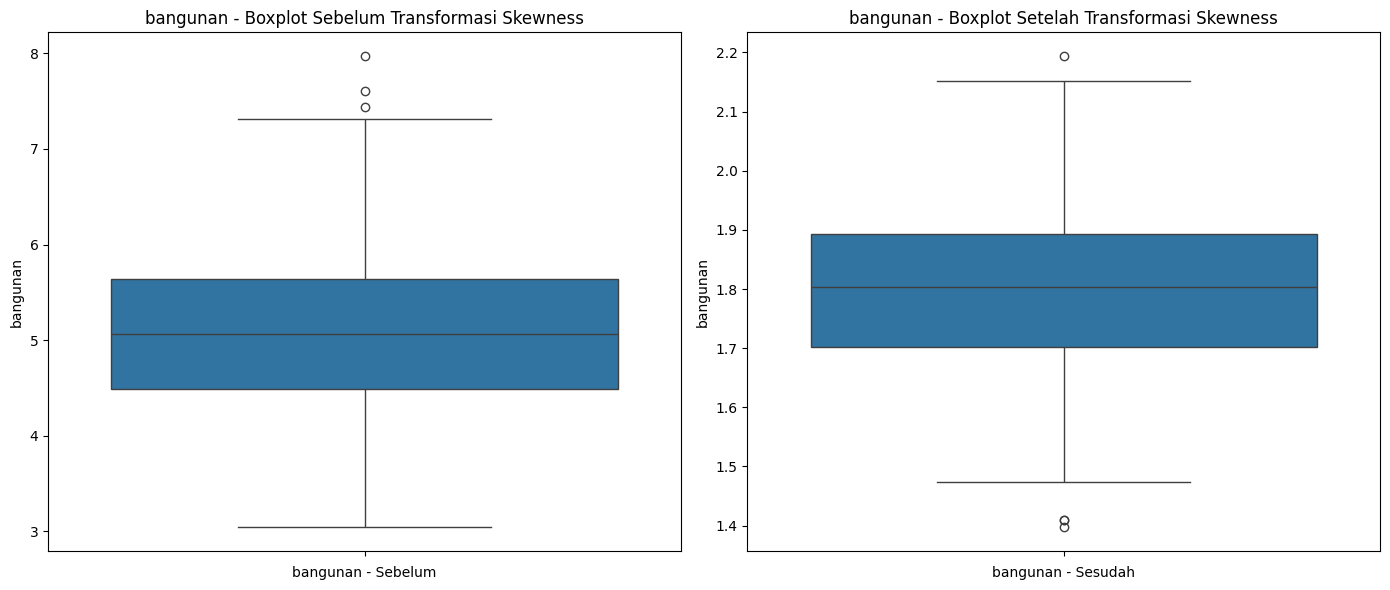

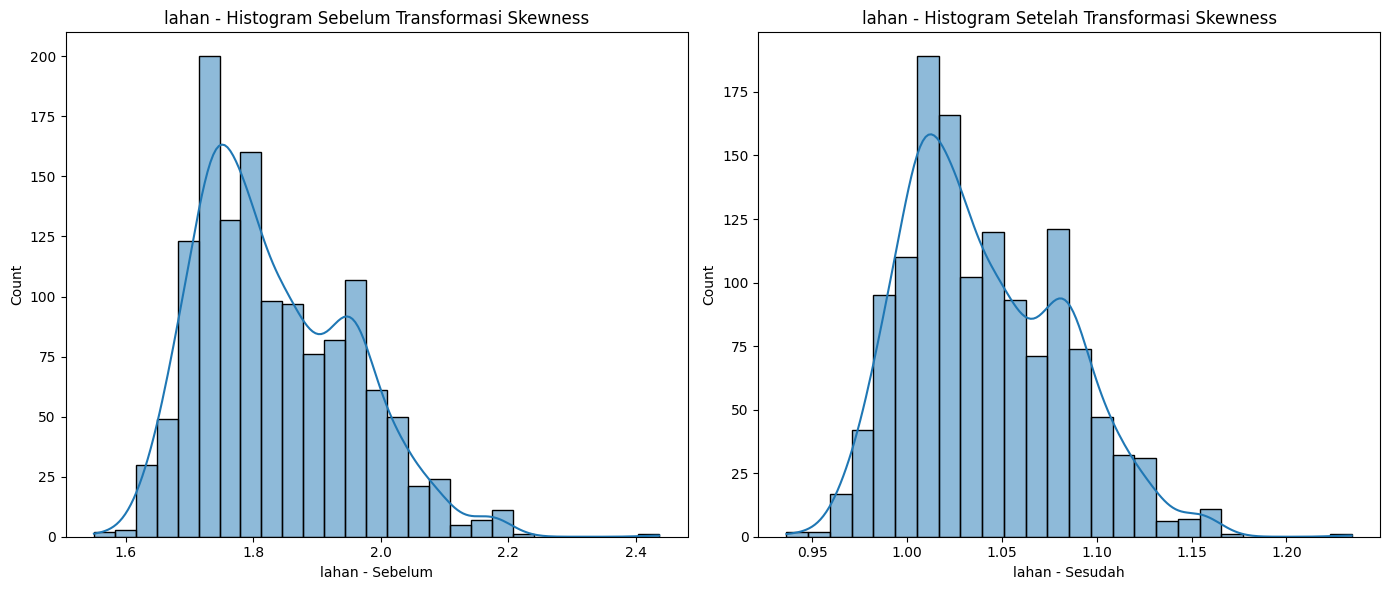

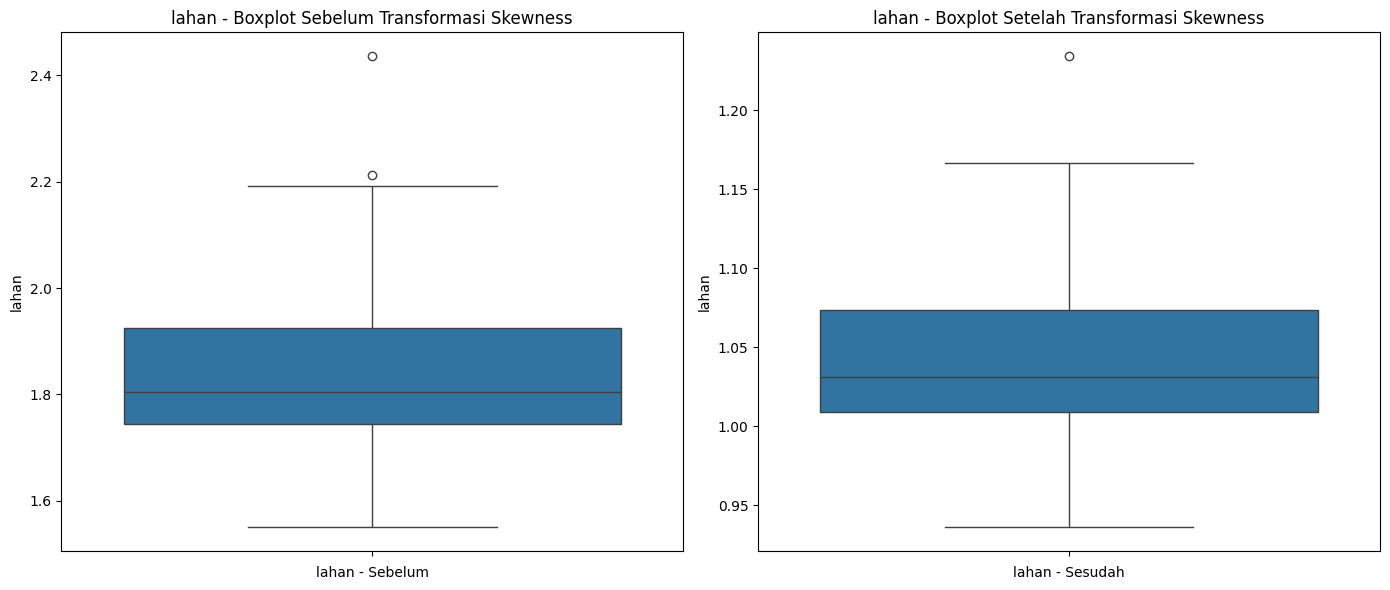

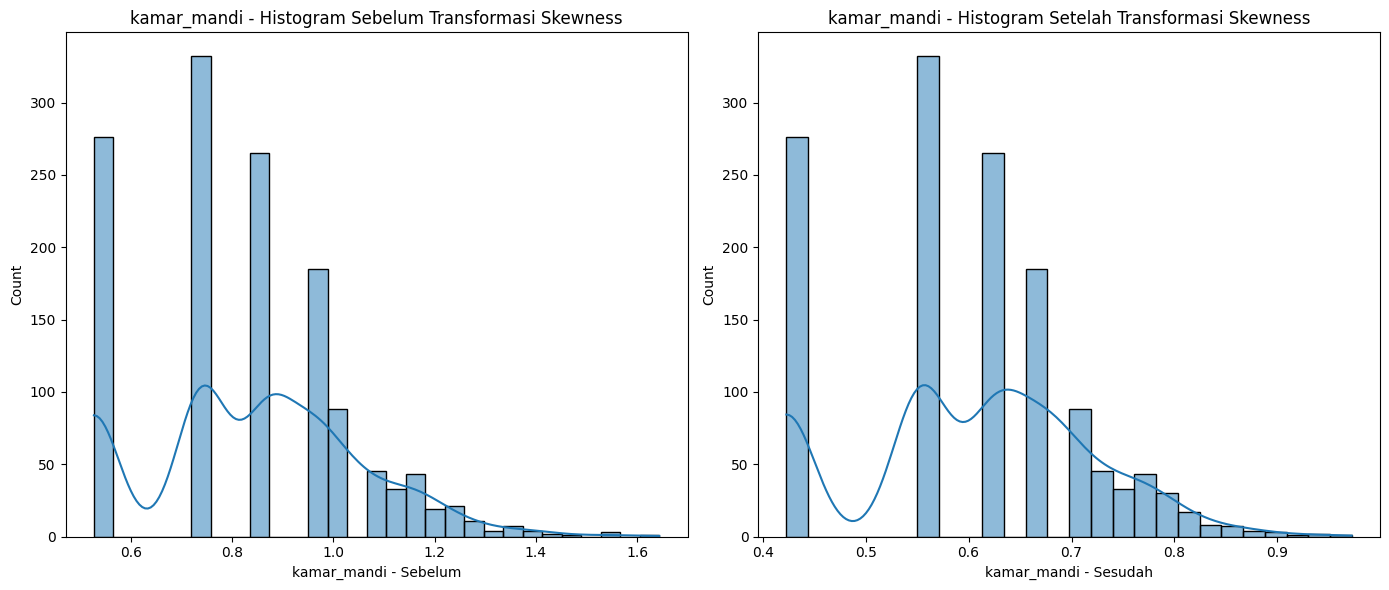

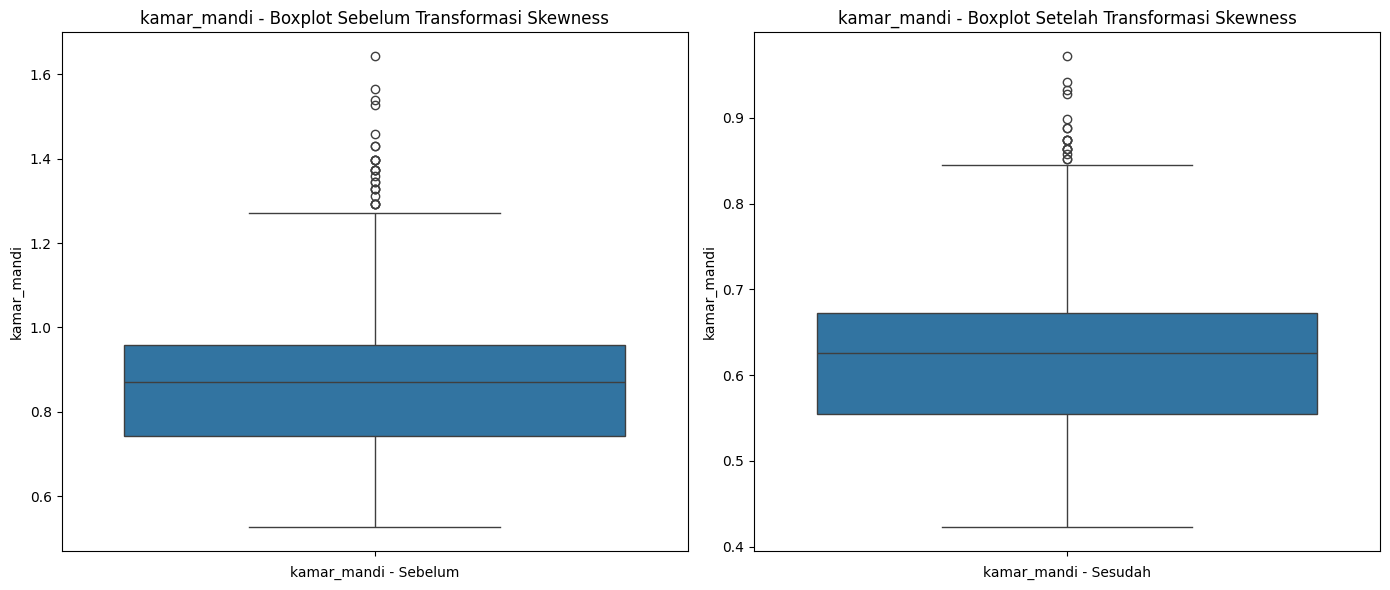

In [90]:
skewness_before = df[skewness_features].apply(lambda x: skew(x.dropna()))

# Mengaplikasikan transformasi skewness hanya pada fitur dengan skewness > 0.75
skew_threshold =  0.75
skewed_features = skewness_before[skewness_before > skew_threshold].index
df[skewed_features] = np.log1p(df[skewed_features])

# Menyiapkan visualisasi sebelum dan sesudah transformasi skewness
for feature in skewness_features:
    plt.figure(figsize=(14, 6))

    # Visualisasi histogram sebelum transformasi skewness
    plt.subplot(1, 2, 1)
    plt.title(f'{feature} - Histogram Sebelum Transformasi Skewness')
    sns.histplot(df[feature], kde=True)
    plt.xlabel(f'{feature} - Sebelum')

    # Visualisasi histogram setelah transformasi skewness
    plt.subplot(1, 2, 2)
    plt.title(f'{feature} - Histogram Setelah Transformasi Skewness')
    sns.histplot(np.log1p(df[feature]), kde=True)
    plt.xlabel(f'{feature} - Sesudah')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))

    # Boxplot sebelum transformasi skewness
    plt.subplot(1, 2, 1)
    plt.title(f'{feature} - Boxplot Sebelum Transformasi Skewness')
    sns.boxplot(x=None, y=df[feature])
    plt.xlabel(f'{feature} - Sebelum')

    # Boxplot setelah transformasi skewness
    plt.subplot(1, 2, 2)
    plt.title(f'{feature} - Boxplot Setelah Transformasi Skewness')
    sns.boxplot(x=None, y=np.log1p(df[feature]))
    plt.xlabel(f'{feature} - Sesudah')

    plt.tight_layout()
    plt.show()

In [91]:
skewness = df[['harga','kamar_tidur', 'bangunan','lahan','kamar_mandi']]
skewed_train = skewness.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
df[skewed_train.index] = np.log1p(df[skewed_train.index])

In [93]:
df.head()

,alamat,harga,kamar_tidur,bangunan,lahan,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,tv_kabel,...,balkon,dek,halaman_terbuka,area_hiburan_outdoor,pagar_penuh,taman,keamanan_24_jam,taman_bermain_anak,latitude,longitude
0,Yogyakarta,20.703063,0.741276,4.204693,1.710658,0.741276,N,N,N,N,...,N,N,N,N,N,Y,N,N,-7.801195,110.364917
1,Jetis,21.253894,0.959135,4.948760,1.976385,1.026672,N,N,N,N,...,N,N,N,N,N,Y,Y,Y,-8.035127,110.490835
2,Mergangsan,22.227343,0.959135,5.860786,1.862904,0.959135,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,-7.814734,110.372558
3,Mantrijeron,21.023370,0.869742,4.189655,1.706721,0.869742,N,N,N,N,...,Y,Y,Y,N,Y,Y,Y,N,-7.818068,110.359723
4,Umbulharjo,21.128731,0.959135,5.564520,1.795732,0.869742,N,N,Y,N,...,N,N,N,N,N,Y,N,N,-7.814378,110.387374


In [94]:
mapping = {'Y': 1, 'N': 0}

fasilitas = ['sistem_alarm', 'gym', 'internet_broadband_wifi', 'tv_kabel', 'pemanas_ruangan', 'air_panas',
                  'telepon', 'tv', 'kitchen_set', 'garasi', 'secure_parking', 'kolam_renang', 'lapangan_tenis',
                  'balkon', 'dek', 'halaman_terbuka', 'area_hiburan_outdoor', 'pagar_penuh', 'taman',
                  'keamanan_24_jam', 'taman_bermain_anak']

df[fasilitas] = df[fasilitas].replace(mapping)

In [95]:
X = df[['kamar_tidur', 'kamar_mandi', 'lahan', 'bangunan', 'latitude', 'longitude']+ fasilitas]
y = df['harga']

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

Mean Squared Error rf: 0.10201101541285428
R-squared rf: 0.8995273362791483
Mean Absolute Error rf: 0.22174934863242177


In [99]:
import matplotlib.pyplot as plt

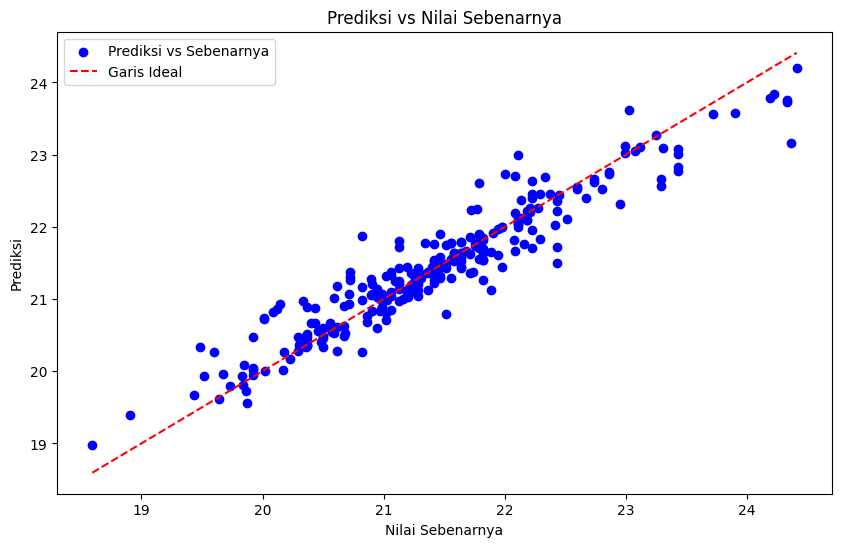

In [100]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error ln: {mse}')
print(f'R-squared ln: {r2}')
print(f'Mean Absolute Error ln: {mae}')

Mean Squared Error ln: 0.18231051052722547
R-squared ln: 0.8204387776864478
Mean Absolute Error ln: 0.3260595708933342


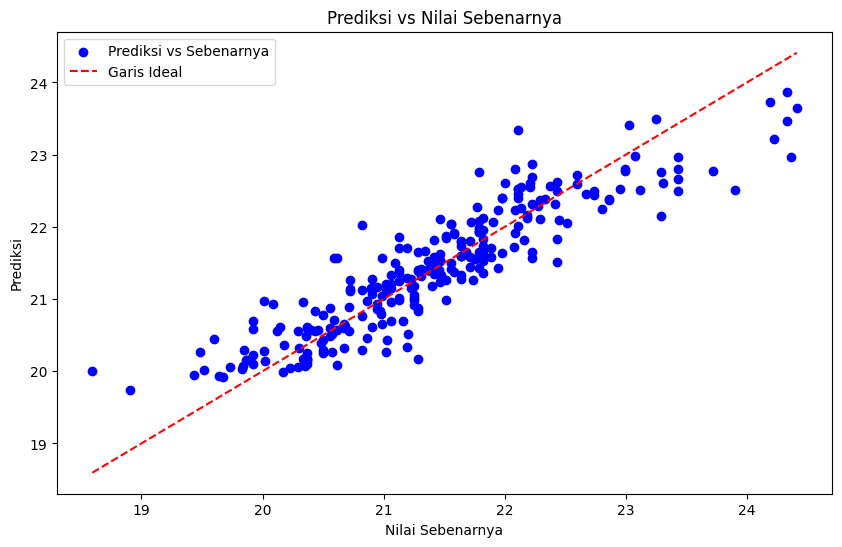

In [102]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [103]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print('Ridge Regression:')
print(f'Mean Squared Error: {mse_ridge}')
print(f'R-squared: {r2_ridge}')
print(f'Mean Absolute Error: {mae_ridge}')

Ridge Regression:
Mean Squared Error: 0.18844050795535502
R-squared: 0.8144012221566502
Mean Absolute Error: 0.3305758839254189


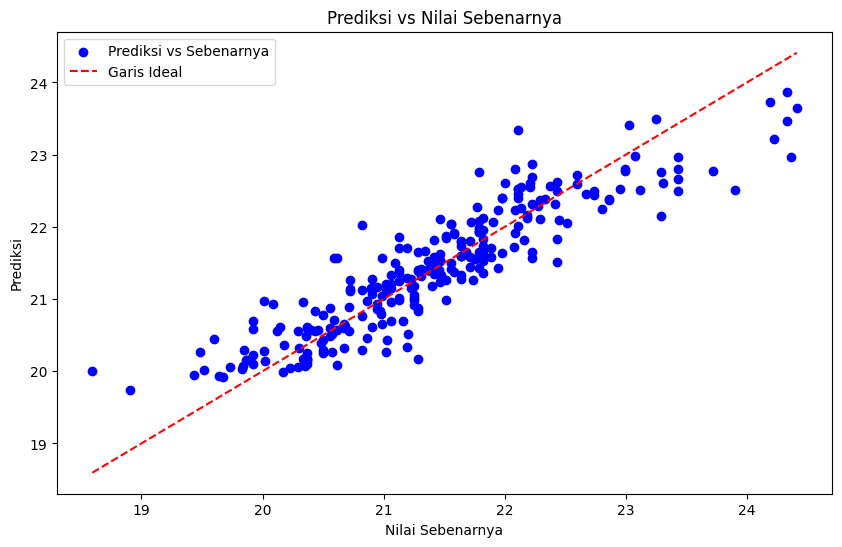

In [104]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [105]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Tampilkan hasil evaluasi Lasso Regression
print('Lasso Regression:')
print(f'Mean Squared Error: {mse_lasso}')
print(f'R-squared: {r2_lasso}')
print(f'Mean Absolute Error: {mae_lasso}')

Lasso Regression:
Mean Squared Error: 1.0215416291349266
R-squared: -0.006136525212858235
Mean Absolute Error: 0.7767302348089395


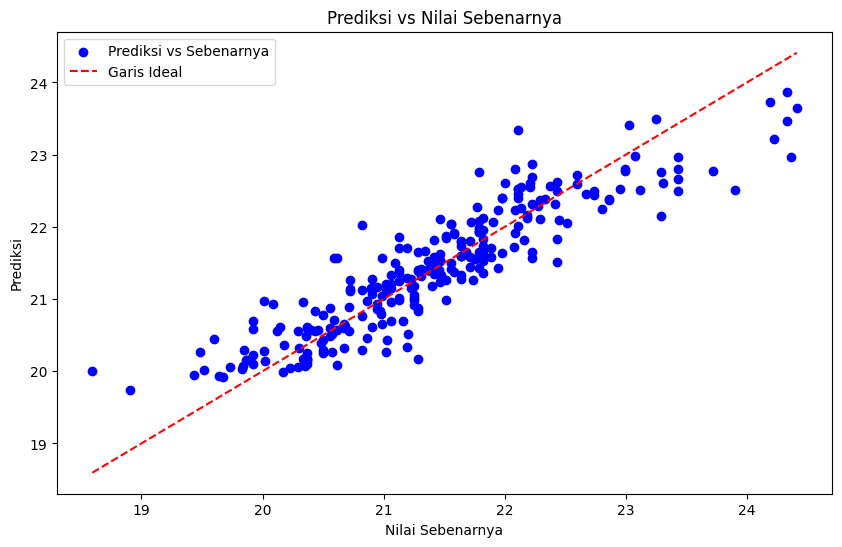

In [106]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print('Decision Tree:')
print(f'Mean Squared Error: {mse_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Decision Tree:
Mean Squared Error: 0.20685693502725017
R-squared: 0.7962625194229751
Mean Absolute Error: 0.28641412202807776


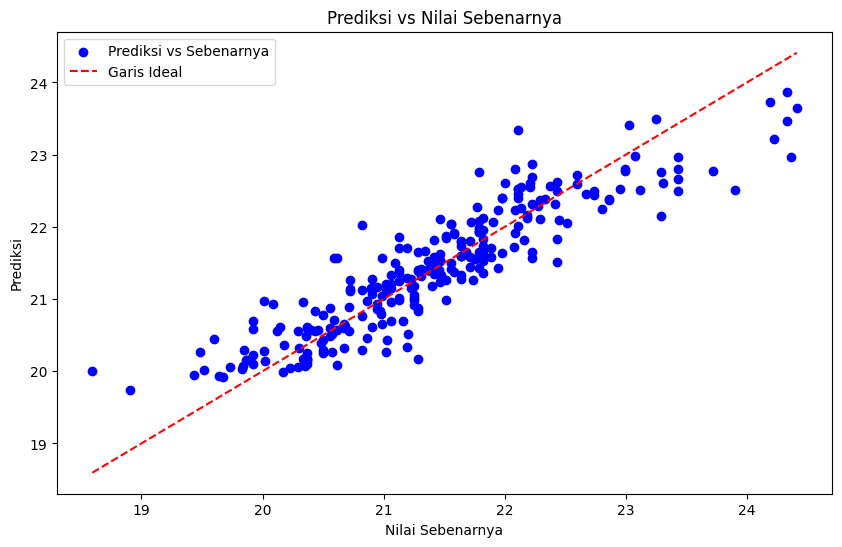

In [108]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [109]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error rf: 0.10443834611606663
R-squared rf: 0.897136610331601
Mean Absolute Error rf: 0.22471588645709245


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Mean Squared Error rf: 0.10993168235896163
R-squared rf: 0.8917261149767198
Mean Absolute Error rf: 0.22893241178410947


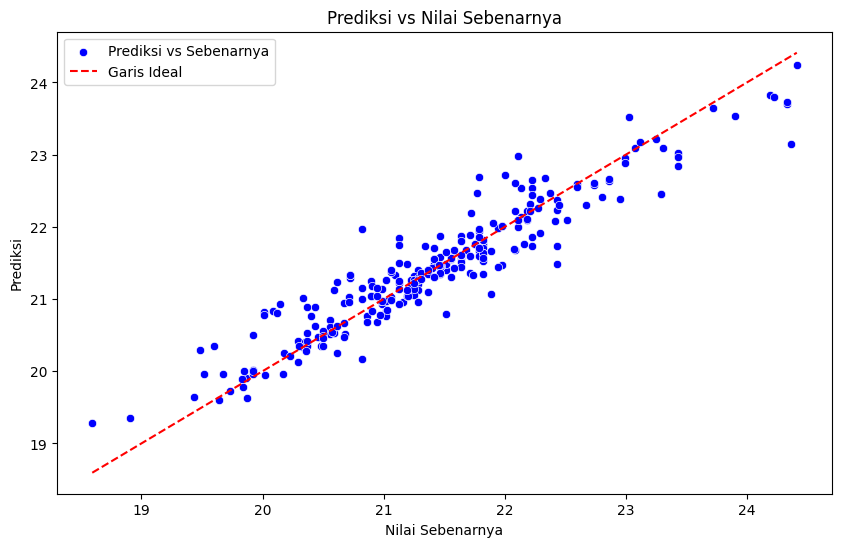

In [113]:
import seaborn as sns

model = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", model.get_params())
print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

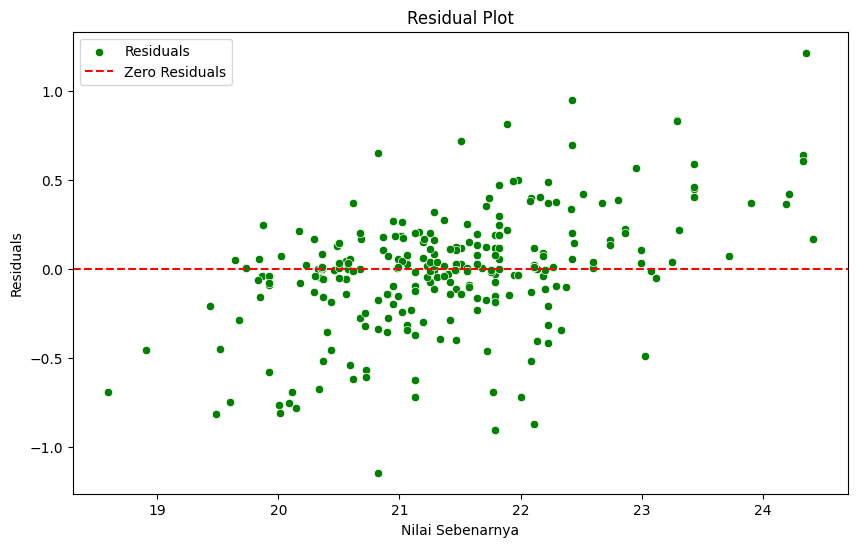

In [114]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='green', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.legend()
plt.show()

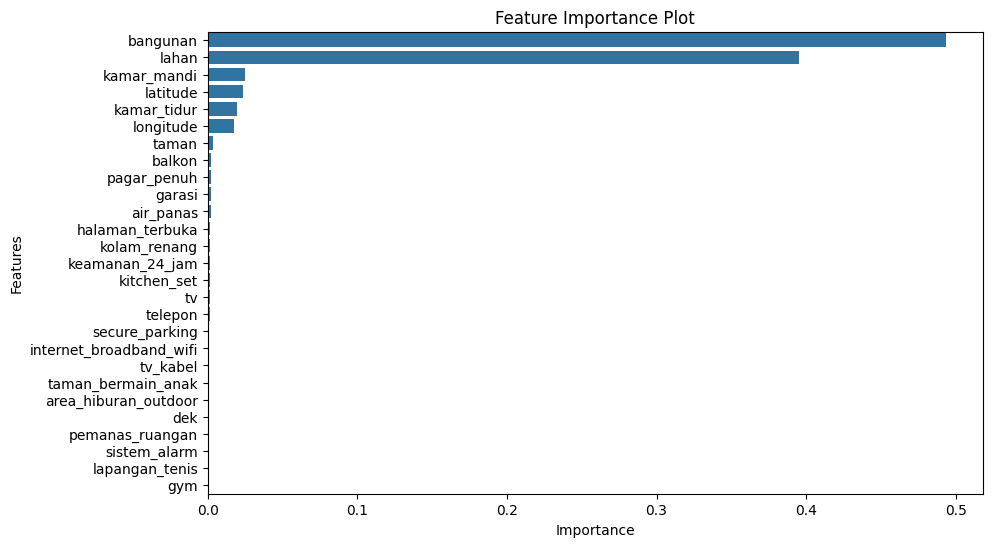

In [115]:
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

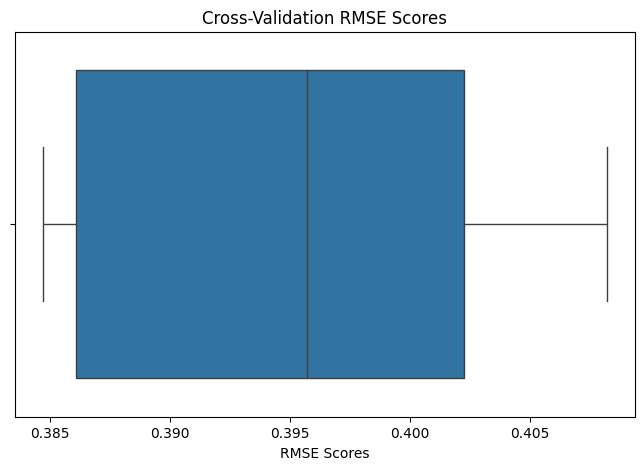

In [116]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

plt.figure(figsize=(8, 5))
sns.boxplot(x=cv_rmse_scores)
plt.title('Cross-Validation RMSE Scores')
plt.xlabel('RMSE Scores')
plt.show()

In [117]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)